In [131]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score


# Load data

In [132]:
data = pd.read_csv("daily_food_nutrition_dataset.csv")


In [133]:
data.shape

(10000, 14)

In [134]:
data.head(10)

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471
5,2024-01-19,620,Oats,Grains,387,31.2,6.8,39.5,5.1,0.7,300,244,Dinner,727
6,2024-07-27,714,Carrot,Vegetables,138,28.2,12.4,20.2,2.8,37.8,933,15,Dinner,733
7,2024-10-21,992,Cookies,Snacks,69,36.8,17.8,15.0,9.6,36.4,185,228,Snack,386
8,2024-07-23,535,Apple,Fruits,568,6.7,7.0,23.4,6.4,46.9,336,129,Breakfast,931
9,2024-09-08,594,Quinoa,Grains,204,19.3,62.7,31.8,6.8,40.3,887,135,Snack,662


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [136]:
data.describe()

,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [137]:
data.isnull().sum()

Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64

# EDA

<Axes: title={'center': 'Food Items'}, xlabel='Food_Item'>

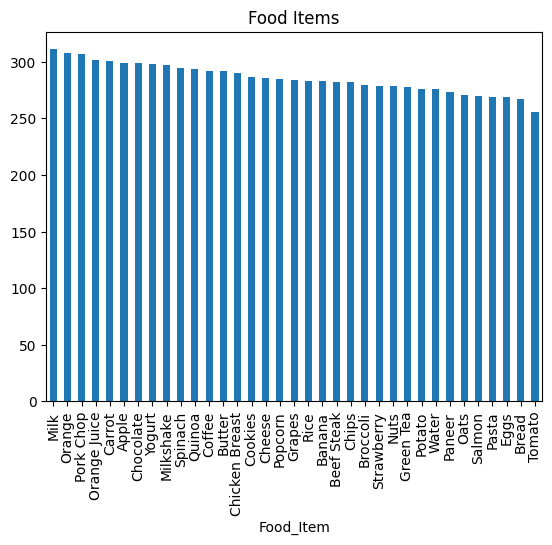

In [138]:
data['Food_Item'].value_counts().plot(kind='bar', title='Food Items')


<Axes: title={'center': 'Category'}, xlabel='Category'>

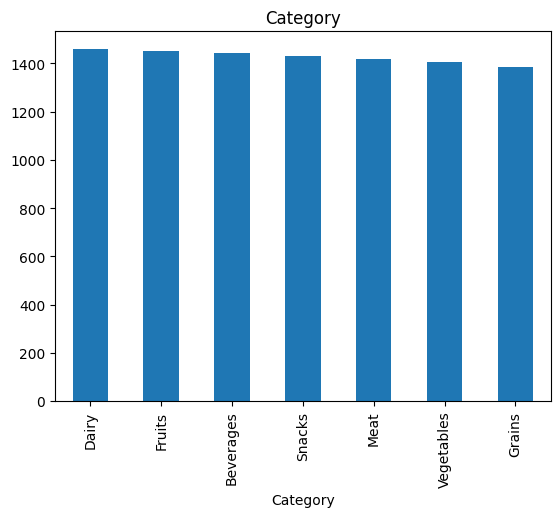

In [139]:
data['Category'].value_counts().plot(kind='bar', title='Category')

<Axes: title={'center': 'Meal Type'}, xlabel='Meal_Type'>

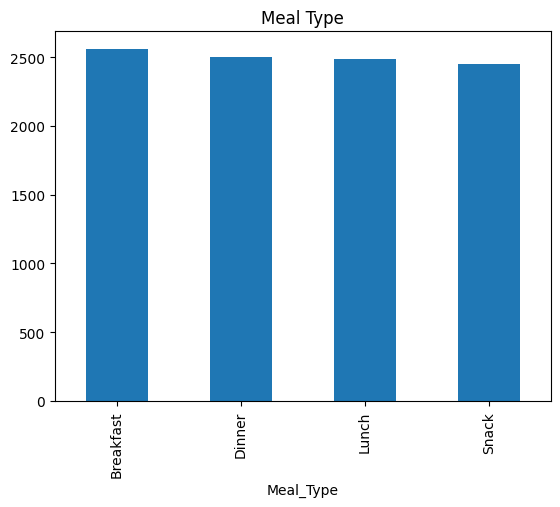

In [140]:
data['Meal_Type'].value_counts().plot(kind='bar', title='Meal Type')

In [141]:
thresholds = {
    'Calories (kcal)':    {'low': 250,  'high': 500},    # kcal
    'Fat (g)':             {'low': 3,    'high': 17.5},   # g
    'Sugars (g)':          {'low': 5,    'high': 22.5},   # g
    'Sodium (mg)':         {'low': 300,  'high': 1500},   # mg
    'Cholesterol (mg)':    {'low': 20,   'high': 60},     # mg
  
}

def cat_nutrient(value, nutrient):
    low, high = thresholds[nutrient]['low'], thresholds[nutrient]['high']
    if value <= low:
        return 'low'
    if value >= high:
        return 'high'
    return 'medium'

def assign_nutrition_label(row):
    cats = [
        cat_nutrient(row['Calories (kcal)'], 'Calories (kcal)'),
        cat_nutrient(row['Fat (g)'],        'Fat (g)'),
        cat_nutrient(row['Sugars (g)'],     'Sugars (g)'),
        cat_nutrient(row['Sodium (mg)'],    'Sodium (mg)'),
        cat_nutrient(row['Cholesterol (mg)'],'Cholesterol (mg)')
    ]
    if 'high' in cats:
        return 'unhealthy'
    if all(c == 'low' for c in cats):
        return 'healthy'
    return 'moderate'

# 5. Apply and check
data['Nutrition_Label'] = data.apply(assign_nutrition_label, axis=1)
print(data['Nutrition_Label'].value_counts())


Nutrition_Label
unhealthy    9766
moderate      234
Name: count, dtype: int64


In [142]:
data.drop(columns=['Food_Item', 'Category', 'Meal_Type','Date','User_ID','Water_Intake (ml) '], errors='ignore', inplace=True)

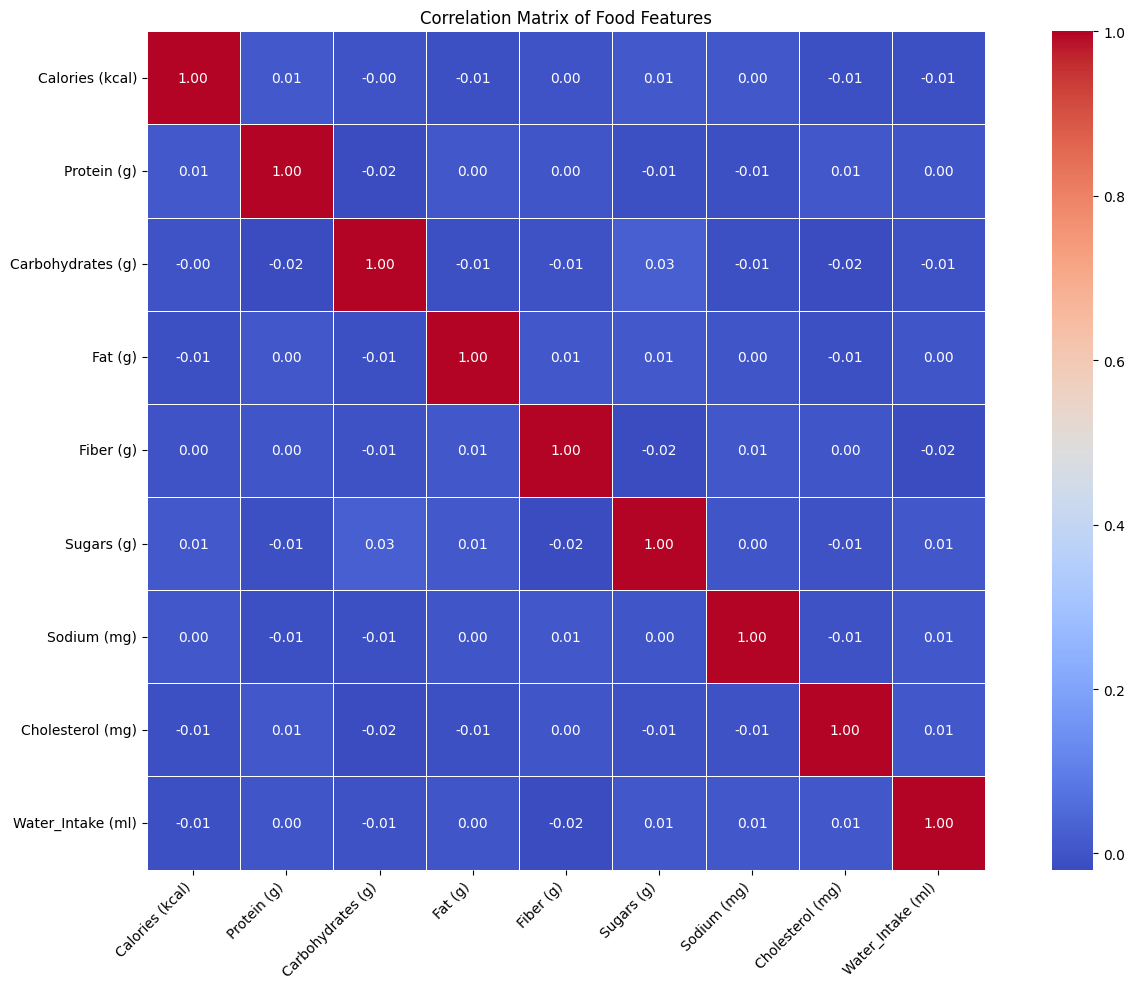

In [143]:
# Correlation Matrix
numeric_df = data.drop(columns='Nutrition_Label')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Food Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [144]:
data['Nutrition_Label'].value_counts(normalize=True)

Nutrition_Label
unhealthy    0.9766
moderate     0.0234
Name: proportion, dtype: float64

<Axes: xlabel='Nutrition_Label'>

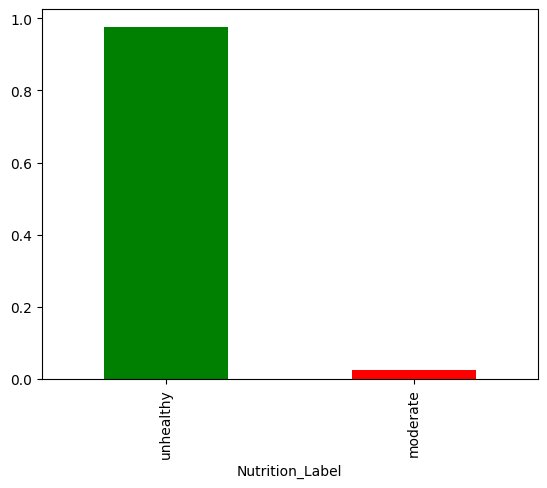

In [145]:
data['Nutrition_Label'].value_counts(normalize=True).plot.bar(color=['green','red'])

# Target Encoding


In [146]:
X=data.drop(columns='Nutrition_Label')
y=data['Nutrition_Label']

In [147]:
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

In [148]:
label_mapping=dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
print("nutri",label_mapping)

nutri {'moderate': np.int64(0), 'unhealthy': np.int64(1)}


Data Splitting

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=41, stratify=y_encoded)

Preprocessing Pipeline

In [150]:
log_transformer = FunctionTransformer(np.log1p, validate=True)

pipeline = Pipeline([
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

X_train_scaled = pipeline.fit_transform(X_train)

# transforming X_test
X_test_scaled = pipeline.transform(X_test)

In [151]:
print(f"Training dataset shape, X_train: {X_train_scaled.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (8000, 9), y_train: (8000,)


In [152]:
print(f"Testing dataset shape, X_test: {X_test_scaled.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (2000, 9), y_test: (2000,)


# Multinomial Logistic Regression

1. Without Regularization

In [156]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
# predcitions
y_pred = clf.predict(X_test_scaled)

c:\Users\Adio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [157]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.977,
 'recall': array([0.19148936, 0.99590374]),
 'precision': array([0.52941176, 0.98083712]),
 'f1score': array([0.28125   , 0.98831301])}

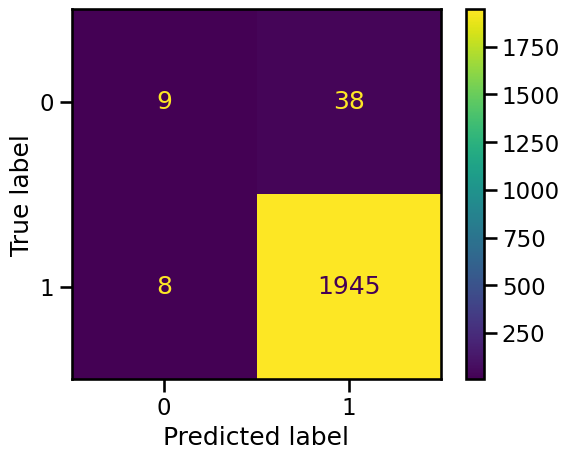

In [158]:
cf = confusion_matrix(y_test, y_pred)
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=clf.classes_)
disp.plot()
plt.show()

Breakdown of the Confusion Matrix
This matrix is structured as follows:

Rows represent the true labels (actual classes):
Row 1: True label 0
Row 2: True label 1
Columns represent the predicted labels (model’s predictions):
Column 1: Predicted label 0
Column 2: Predicted label 1

The four values in the matrix are:

Top-left (9): True Negatives (TN) — The model correctly predicted 9 instances as class 0.
Top-right (38): False Positives (FP) — The model incorrectly predicted 38 instances as class 1 when they were actually class 0.
Bottom-left (8): False Negatives (FN) — The model incorrectly predicted 8 instances as class 0 when they were actually class 1.
Bottom-right (1945): True Positives (TP) — The model correctly predicted 1945 instances as class 1.       Interpretation of the Results
1. Class Distribution and Imbalance

Total instances of class 0: $ 9 \, (\text{TN}) + 38 \, (\text{FP}) = 47 $
Total instances of class 1: $ 1945 \, (\text{TP}) + 8 \, (\text{FN}) = 1953 $
Total instances: $ 47 + 1953 = 2000 $

The dataset is heavily imbalanced:

Class 1 has 1953 instances (97.65% of the data).
Class 0 has only 47 instances (2.35% of the data).

This imbalance explains why the model performs well on class 1 but struggles with class 0—it’s biased toward predicting the majority class (class 1).
2. Overall Accuracy
The accuracy of the model is calculated as the proportion of correct predictions:
$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total instances}} = \frac{1945 + 9}{2000} = \frac{1954}{2000} = 0.977 \, \text{(or 97.7\%)}$$
The model has a high accuracy of 97.7%, but this number is misleading because it’s heavily influenced by the large number of correct predictions for class 1 (1945 TPs). Let’s dig deeper into class-specific performance.
3. Precision and Recall
To better understand how the model performs for each class, let’s calculate precision and recall:

Class 1 (Positive Class):

Precision: The proportion of predicted class 1 instances that are actually class 1.
$$\text{Precision}_1 = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{1945}{1945 + 38} = \frac{1945}{1983} \approx 0.981 \, \text{(98.1\%)}$$

When the model predicts class 1, it’s correct 98.1% of the time.


Recall: The proportion of actual class 1 instances that the model correctly identifies.
$$\text{Recall}_1 = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{1945}{1945 + 8} = \frac{1945}{1953} \approx 0.996 \, \text{(99.6\%)}$$

The model correctly identifies 99.6% of all actual class 1 instances.




Class 0 (Negative Class):

Precision: The proportion of predicted class 0 instances that are actually class 0.
$$\text{Precision}_0 = \frac{\text{TN}}{\text{TN} + \text{FN}} = \frac{9}{9 + 8} = \frac{9}{17} \approx 0.529 \, \text{(52.9\%)}$$

When the model predicts class 0, it’s correct only 52.9% of the time.


Recall: The proportion of actual class 0 instances that the model correctly identifies.
$$\text{Recall}_0 = \frac{\text{TN}}{\text{TN} + \text{FP}} = \frac{9}{9 + 38} = \frac{9}{47} \approx 0.191 \, \text{(19.1\%)}$$

The model correctly identifies only 19.1% of all actual class 0 instances.





4. Key Insights

Strengths:

The model excels at predicting class 1, with very high precision (98.1%) and recall (99.6%). It rarely misses class 1 instances (only 8 FNs) and is highly reliable when it predicts class 1.


Weaknesses:

The model performs poorly on class 0:

Low recall (19.1%) means it misses most class 0 instances (38 FPs vs. 9 TNs).
Moderate precision (52.9%) indicates that when it predicts class 0, it’s often wrong.


The high number of false positives (38) shows the model tends to over-predict class 1, likely due to the class imbalance.



Why This Output Occurs
The model’s behavior is a result of the imbalanced dataset. With class 1 dominating (1953 instances vs. 47 for class 0), the model learns to prioritize class 1 predictions to maximize overall accuracy. This bias leads to:

Excellent performance on class 1 (high TP, low FN).
Poor performance on class 0 (low TN, high FP).

In [160]:
data['Nutrition_Label'].value_counts(normalize=True)

Nutrition_Label
unhealthy    0.9766
moderate     0.0234
Name: proportion, dtype: float64

Features Importance

In [161]:
clf.coef_


array([[ 0.17816045,  0.0367188 , -0.03157248,  0.59604104,  0.07757433,
         0.43304657,  0.00810377,  0.57758549,  0.00979927]])

In [163]:
# Extract and sort feature coefficie
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals
# visualizing coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

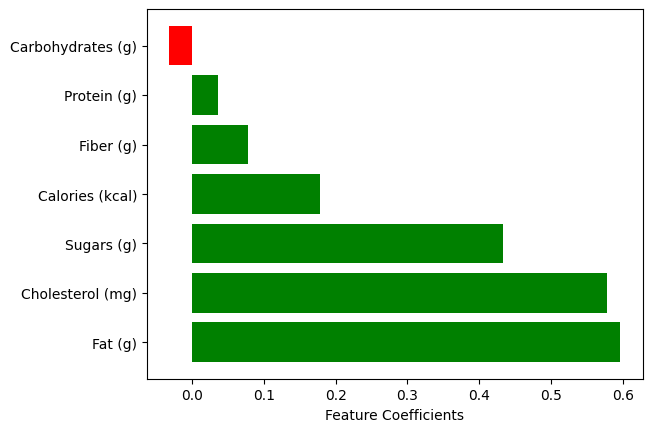

In [165]:
# coefficients for the only available class (index 0)
coef_dict = get_feature_coefs(clf, 0, X.columns)
visualize_coefs(coef_dict)